In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

for t in load_data():
  #for t in test_results: print(json.dumps(t['diff'], indent=2))
  print(json.dumps(t.summary(), indent=2))
  #pass

metrics = ['input_tokens', 'output_tokens', 'cost', 'latency_ms', 'output_tokens_per_sec']

{
  "model": "gpt-4o-2024-05-13",
  "test_category": "simple",
  "test_count": 400,
  "baml_run_count": 397,
  "baml_skipped_count": 3,
  "baml_pass_count": 395,
  "bfcl_pass_count": 376,
  "baml_pass_rate": 0.9875,
  "bfcl_pass_rate": 0.94
}
{
  "model": "gpt-4o-2024-05-13",
  "test_category": "multiple_function",
  "test_count": 200,
  "baml_run_count": 194,
  "baml_skipped_count": 6,
  "baml_pass_count": 194,
  "bfcl_pass_count": 175,
  "baml_pass_rate": 0.97,
  "bfcl_pass_rate": 0.875
}
{
  "model": "gpt-4o-2024-05-13",
  "test_category": "parallel_function",
  "test_count": 200,
  "baml_run_count": 199,
  "baml_skipped_count": 1,
  "baml_pass_count": 151,
  "bfcl_pass_count": 154,
  "baml_pass_rate": 0.755,
  "bfcl_pass_rate": 0.77
}
{
  "model": "gpt-4o-2024-05-13",
  "test_category": "parallel_multiple_function",
  "test_count": 200,
  "baml_run_count": 194,
  "baml_skipped_count": 6,
  "baml_pass_count": 143,
  "bfcl_pass_count": 136,
  "baml_pass_rate": 0.715,
  "bfcl_pass_rat

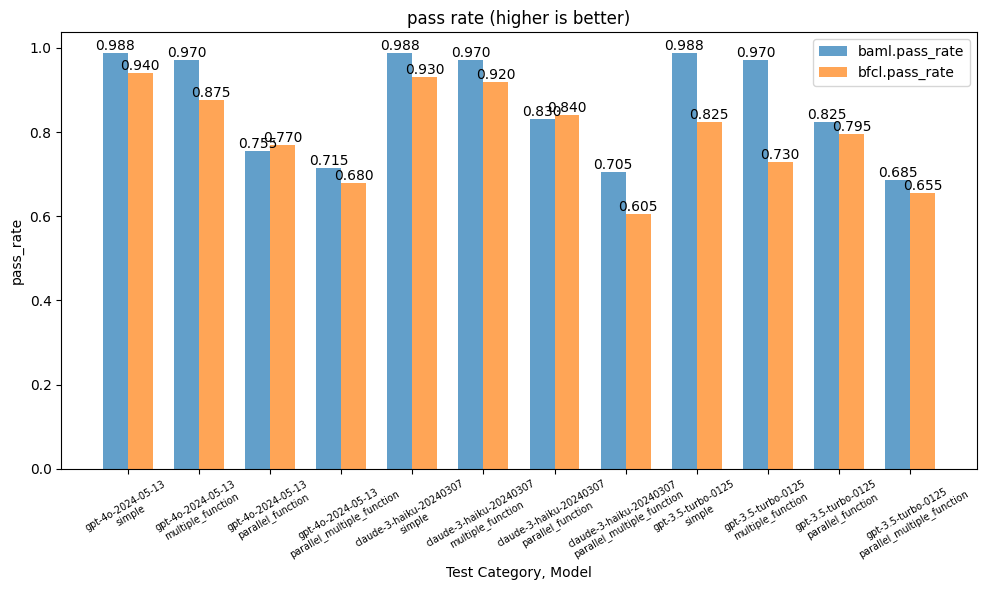

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'baml.pass_rate': t.baml_pass_rate,
    'bfcl.pass_rate': t.bfcl_pass_rate,
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML pass_rate
baml_bars = ax.bar(index, df['baml.pass_rate'], bar_width, label='baml.pass_rate', capsize=5, alpha=0.7)
ax.bar_label(baml_bars, label_type='edge', fmt='%.3f')

# Create bars for BFCL pass_rate
bfcl_bars = ax.bar([p + bar_width for p in index], df['bfcl.pass_rate'], bar_width, label='bfcl.pass_rate', capsize=5, alpha=0.7)
ax.bar_label(bfcl_bars, label_type='edge', fmt='%.3f')

# Labeling and aesthetics
ax.set_xlabel('Test Category, Model')
ax.set_ylabel('pass_rate')
ax.set_title('pass rate (higher is better)')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')
#ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_42760/2430510460.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


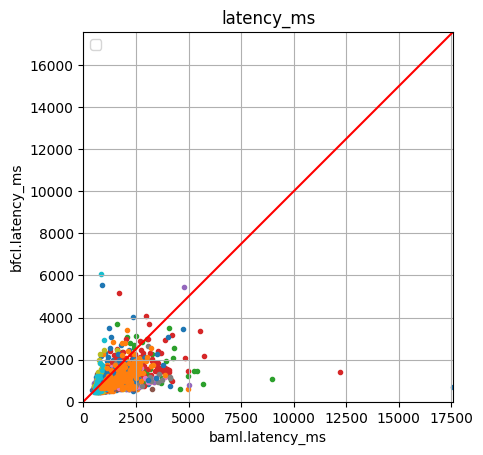

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

max_val = 0
for t in load_data():

  metric = 'input_tokens'
  metric = 'output_tokens'
  metric = 'cost'
  metric = 'latency_ms'
  xlabel = f'baml.{metric}'
  ylabel = f'bfcl.{metric}'

  max_val = max(max_val, t.df[xlabel].max(), t.df[ylabel].max())

  plt.scatter(t.df[xlabel], t.df[ylabel], marker='.')

  plt.title(metric)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)
  plt.legend()

plt.axline((0, 0), slope=1, color='red', label='Infinite line through (0,0)')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)


plt.show()

/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_42760/3052118011.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/zc/6hrv3s157t9g3n_tf8pncl7c0000gn/T/ipykernel_42760/3052118011.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


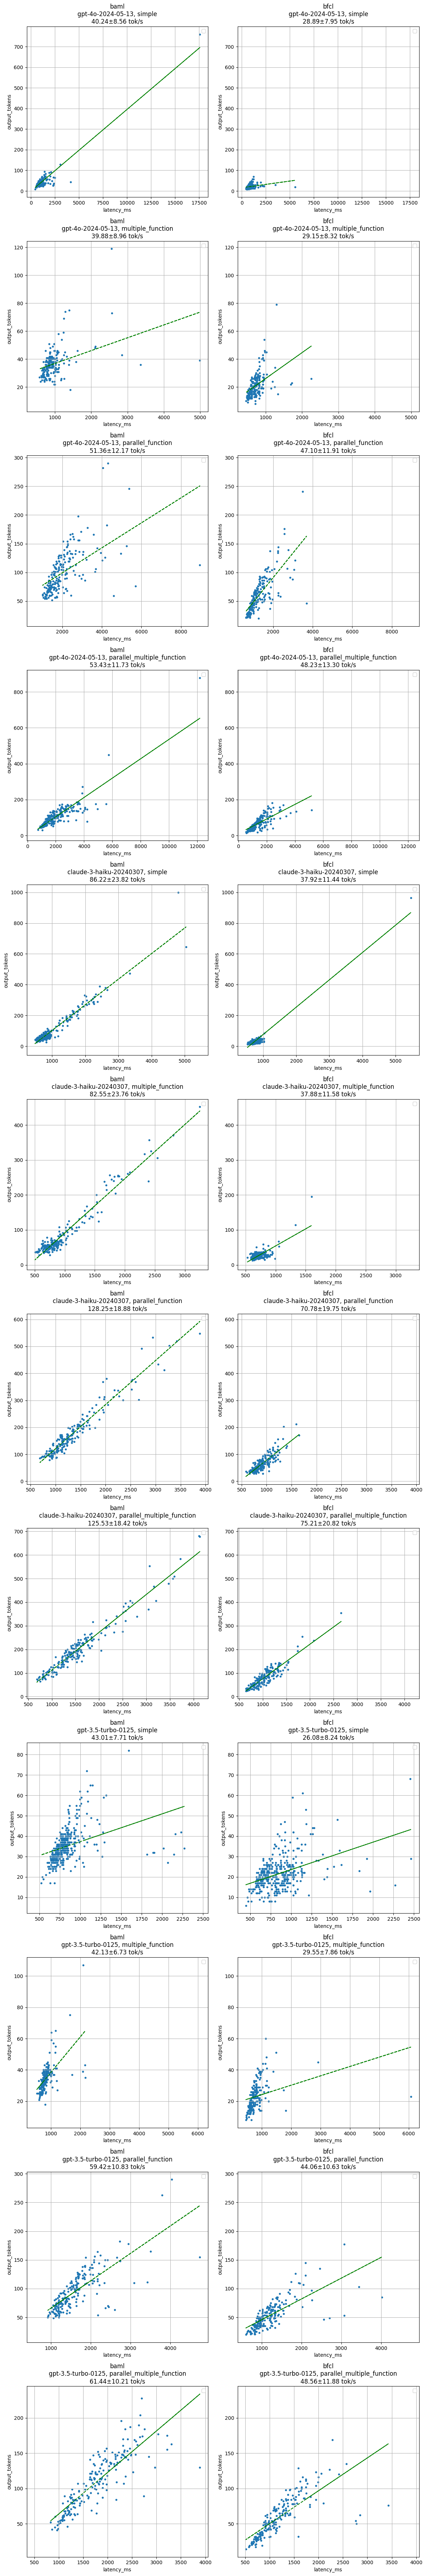

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from eval import load_data

data_sets = list(load_data())  # Load the data and convert to list for reuse
num_datasets = len(data_sets)  # Determine the number of datasets

plt.figure(figsize=(12, 6 * num_datasets))  # Adjust figure size dynamically based on number of datasets

x_unit = 'latency_ms'
y_unit = 'output_tokens'

for i, t in enumerate(data_sets):
    # First subplot for 'baml'
    ax1 = plt.subplot(num_datasets, 2, 2*i + 1)  # nx2 grid, current subplot index
    metric = 'latency_ms'
    xlabel_baml = f'baml.{x_unit}'
    ylabel_baml = f'baml.{y_unit}'
    baml_mean_ratio = (t.df[ylabel_baml] / t.df[xlabel_baml]*1000)

    baml_coef = np.polyfit(t.df[xlabel_baml], t.df[ylabel_baml], 1)  # Linear fit (degree 1)
    baml_poly1d_fn = np.poly1d(baml_coef)
    ax1.plot(t.df[xlabel_baml], baml_poly1d_fn(t.df[xlabel_baml]), 'g--')  # Plot the trend line

    ax1.scatter(t.df[xlabel_baml], t.df[ylabel_baml], marker='.')
    ax1.set_title(f'baml\n{t.model}, {t.test_category}\n{baml_mean_ratio.mean():.2f}±{baml_mean_ratio.std():.2f} tok/s')
    ax1.set_xlabel(x_unit)
    ax1.set_ylabel(y_unit)
    ax1.grid(True)
    ax1.legend()

    # Second subplot for 'bfcl'
    
    ax2 = plt.subplot(num_datasets, 2, 2*i + 2, sharex=ax1, sharey=ax1)  # nx2 grid, current subplot index
    xlabel_bfcl = f'bfcl.{x_unit}'
    ylabel_bfcl = f'bfcl.{y_unit}'
    bfcl_mean_ratio = (t.df[ylabel_bfcl] / t.df[xlabel_bfcl]*1000)

    bfcl_coef = np.polyfit(t.df[xlabel_bfcl], t.df[ylabel_bfcl], 1)  # Linear fit (degree 1)
    bfcl_poly1d_fn = np.poly1d(bfcl_coef)
    ax2.plot(t.df[xlabel_bfcl], bfcl_poly1d_fn(t.df[xlabel_bfcl]), 'g--')  # Plot the trend line

    ax2.scatter(t.df[xlabel_bfcl], t.df[ylabel_bfcl], marker='.')
    ax2.set_title(f'bfcl\n{t.model}, {t.test_category}\n{bfcl_mean_ratio.mean():.2f}±{bfcl_mean_ratio.std():.2f} tok/s')
    ax2.set_xlabel(x_unit)
    ax2.set_ylabel(y_unit)
    ax2.grid(True)
    ax2.legend()

plt.tight_layout()
plt.show()


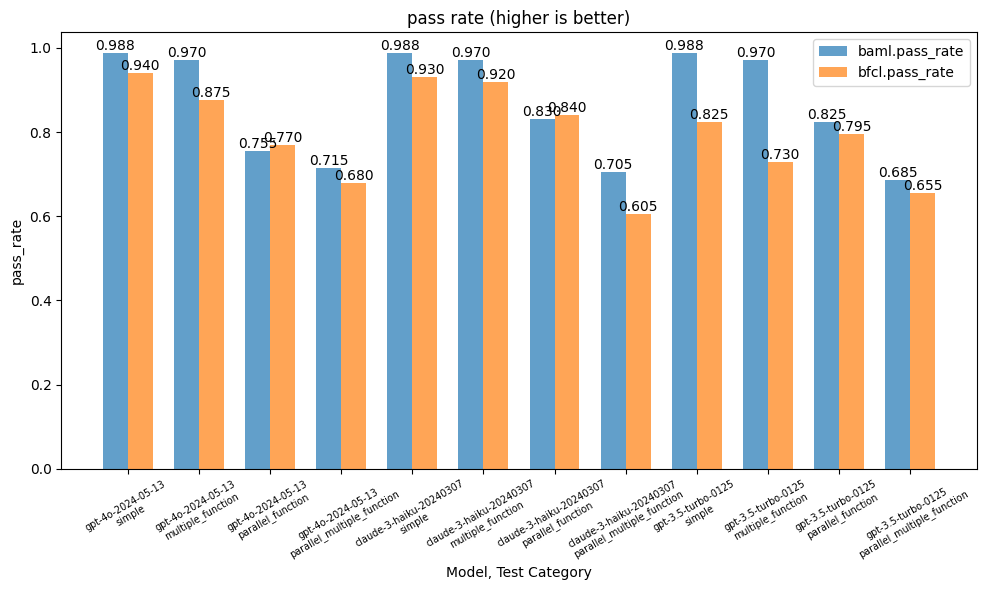

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

df = pd.DataFrame(
  {
    'label_mc': f"{t.model}\n{t.test_category}",
    'baml.pass_rate': t.baml_pass_rate,
    'bfcl.pass_rate': t.bfcl_pass_rate,
  }
  for t in load_data()
)


fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x positions for the groups
n = len(df)  # number of groups
index = range(n)
bar_width = 0.35

# Create bars for BAML pass_rate
baml_bars = ax.bar(index, df['baml.pass_rate'], bar_width, label='baml.pass_rate', capsize=5, alpha=0.7)
ax.bar_label(baml_bars, label_type='edge', fmt='%.3f')

# Create bars for BFCL pass_rate
bfcl_bars = ax.bar([p + bar_width for p in index], df['bfcl.pass_rate'], bar_width, label='bfcl.pass_rate', capsize=5, alpha=0.7)
ax.bar_label(bfcl_bars, label_type='edge', fmt='%.3f')

# Labeling and aesthetics
ax.set_xlabel('Model, Test Category')
ax.set_ylabel('pass_rate')
ax.set_title('pass rate (higher is better)')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')
#ax.set_xticklabels([f'{row.Category}, {row.Model}' for index, row in agg_df.iterrows()])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

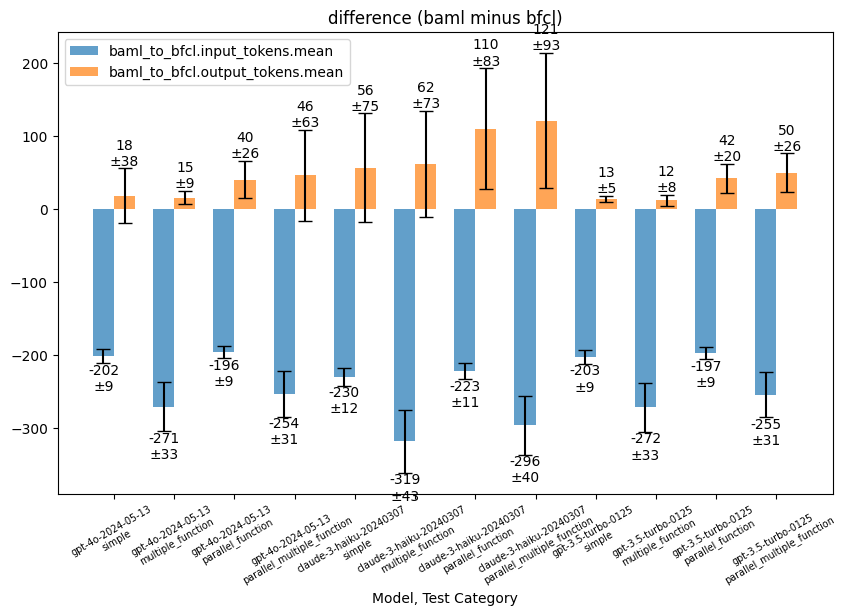

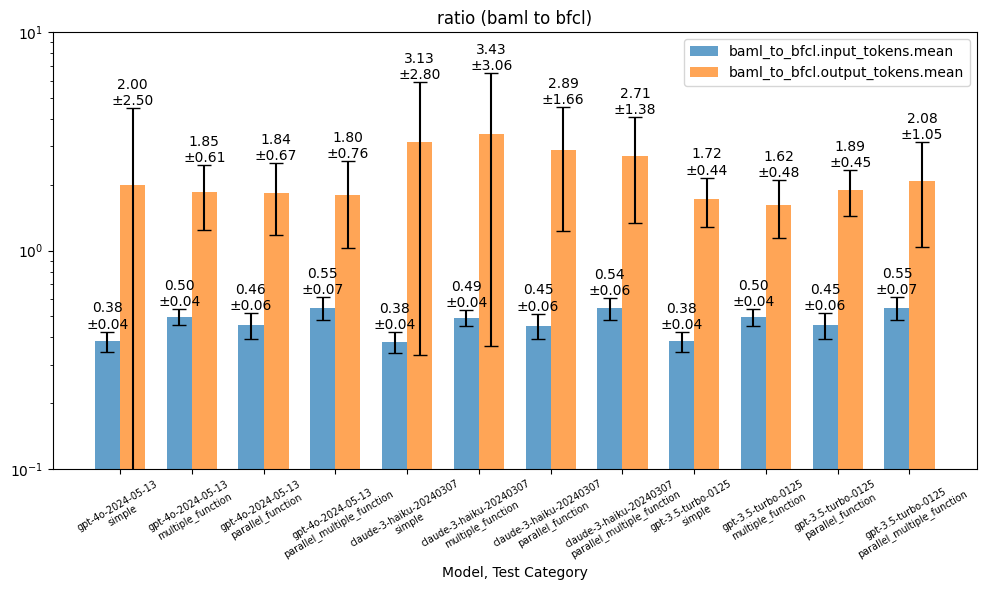

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

def apply_op(op: str, x: pd.Series, y: pd.Series) -> pd.Series:
  if op == '-':
    return x - y

  if op == '/':
    return x / y

  raise ValueError(f'Unknown operation: {op}')

fmt = {
  'input_tokens': {'-': '.0f', '/': '.1f'},
  'output_tokens': {'-': '.0f', '/': '.1f'},
  'cost': {'-': '.5f', '/': '.1f', 'std': '\n±'},
  'latency_ms': {'-': '.0f', '/': '.3f'},
}

fmt = {
  '-': {'fmt': '.0f', 'title': 'difference (baml minus bfcl)'},
  '/': {'fmt': '.2f', 'title': 'ratio (baml to bfcl)'},
}

for i, op in enumerate(['-', '/']):
  plt.figure(i)

  df = pd.DataFrame(
    {
      'label_mc': f"{t.model}\n{t.test_category}",
      'baml.pass_rate': t.baml_pass_rate,
      'bfcl.pass_rate': t.bfcl_pass_rate,
      'baml_to_bfcl.input_tokens.mean': apply_op(op, t.df['baml.input_tokens'], t.df['bfcl.input_tokens']).mean(),
      'baml_to_bfcl.input_tokens.std': apply_op(op, t.df['baml.input_tokens'], t.df['bfcl.input_tokens']).std(),
      'baml_to_bfcl.output_tokens.mean': apply_op(op, t.df['baml.output_tokens'], t.df['bfcl.output_tokens']).mean(),
      'baml_to_bfcl.output_tokens.std': apply_op(op, t.df['baml.output_tokens'], t.df['bfcl.output_tokens']).std(),
    }
    for t in load_data()
  )

  fig, ax = plt.subplots(figsize=(10, 6))

  # Set up the x positions for the groups
  n = len(df)  # number of groups
  index = range(n)
  bar_width = 0.35

  # Create bars for BAML pass_rate
  baml_bars = ax.bar(index, df['baml_to_bfcl.input_tokens.mean'], bar_width, yerr=df['baml_to_bfcl.input_tokens.std'], label='baml_to_bfcl.input_tokens.mean', capsize=5, alpha=0.7)
  labels = [f"{mean:{fmt[op]['fmt']}}\n±{std:{fmt[op]['fmt']}}" for mean, std in zip(df['baml_to_bfcl.input_tokens.mean'], df['baml_to_bfcl.input_tokens.std'])]
  ax.bar_label(baml_bars, labels=labels, label_type='edge')

  # Create bars for BFCL pass_rate
  bfcl_bars = ax.bar([p + bar_width for p in index], df['baml_to_bfcl.output_tokens.mean'], bar_width, yerr=df['baml_to_bfcl.output_tokens.std'], label='baml_to_bfcl.output_tokens.mean', capsize=5, alpha=0.7)
  labels = [f"{mean:{fmt[op]['fmt']}}\n±{std:{fmt[op]['fmt']}}" for mean, std in zip(df['baml_to_bfcl.output_tokens.mean'], df['baml_to_bfcl.output_tokens.std'])]
  ax.bar_label(bfcl_bars, labels=labels, label_type='edge')

  # Labeling and aesthetics
  ax.set_xlabel('Model, Test Category')
  ax.set_title(fmt[op]['title'])
  ax.set_xticks([p + bar_width / 2 for p in index])
  ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')
  if op == '/':
    ax.set_yscale('log')
    ax.set_ylim(.1, 10)
  ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

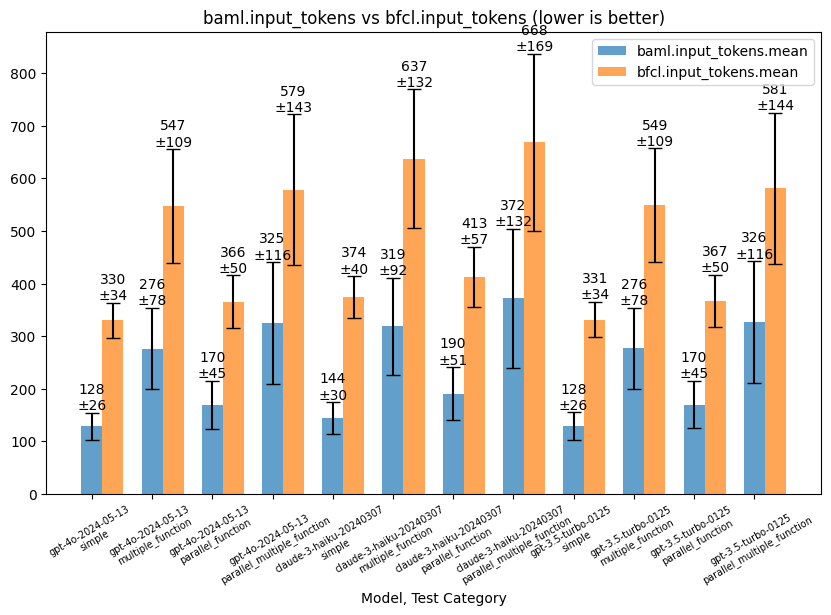

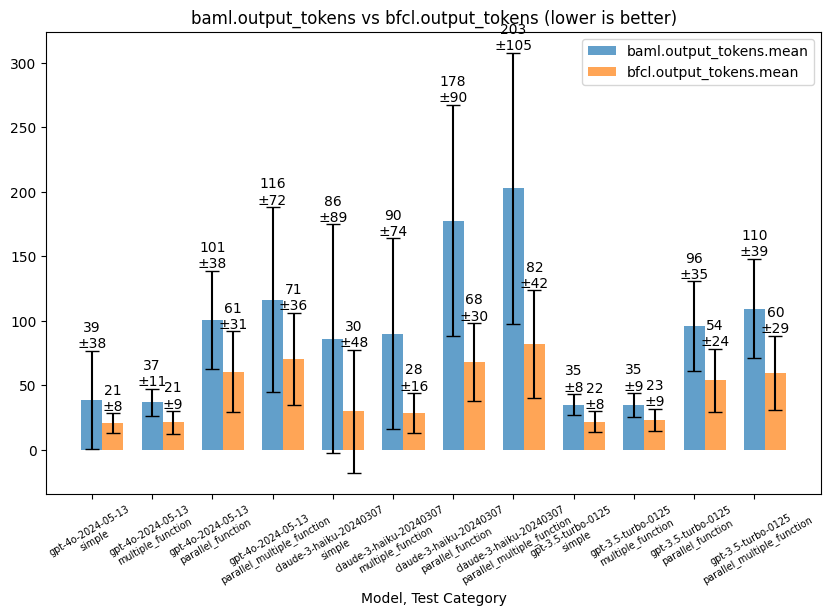

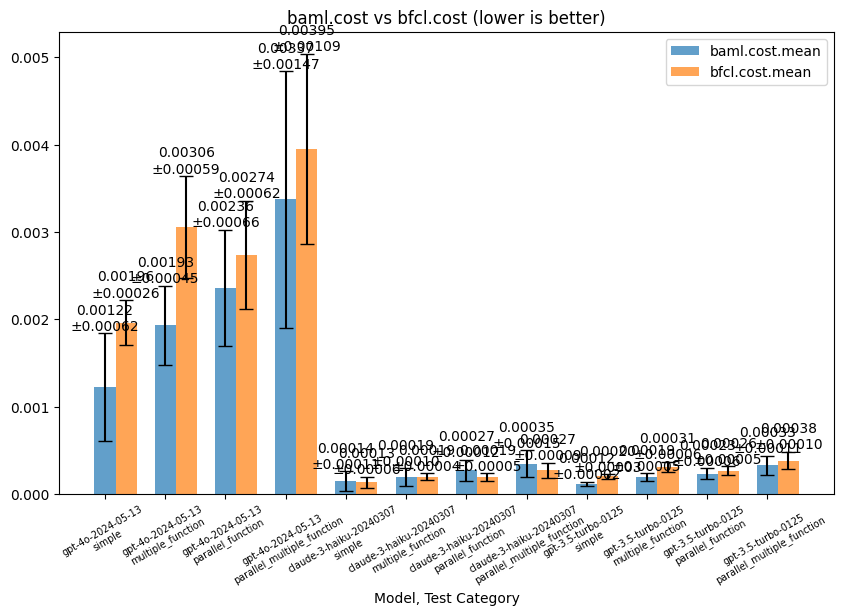

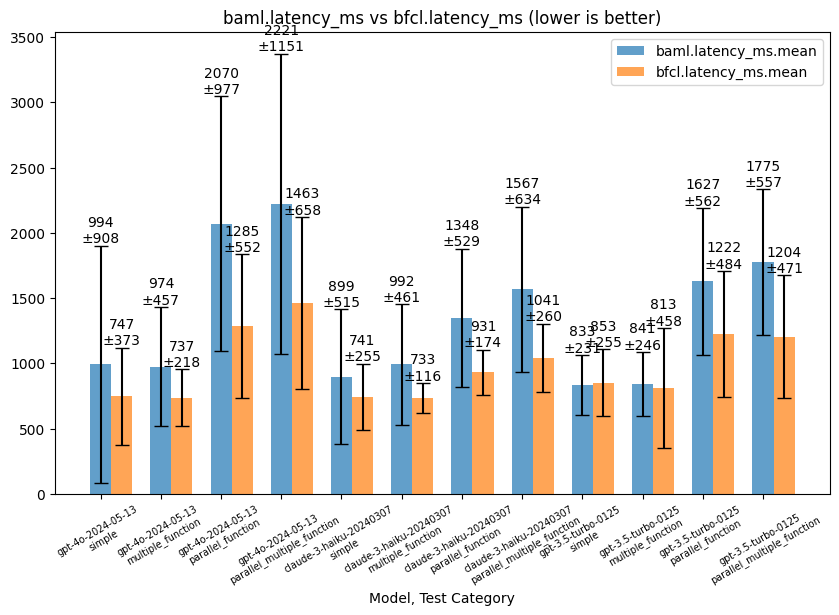

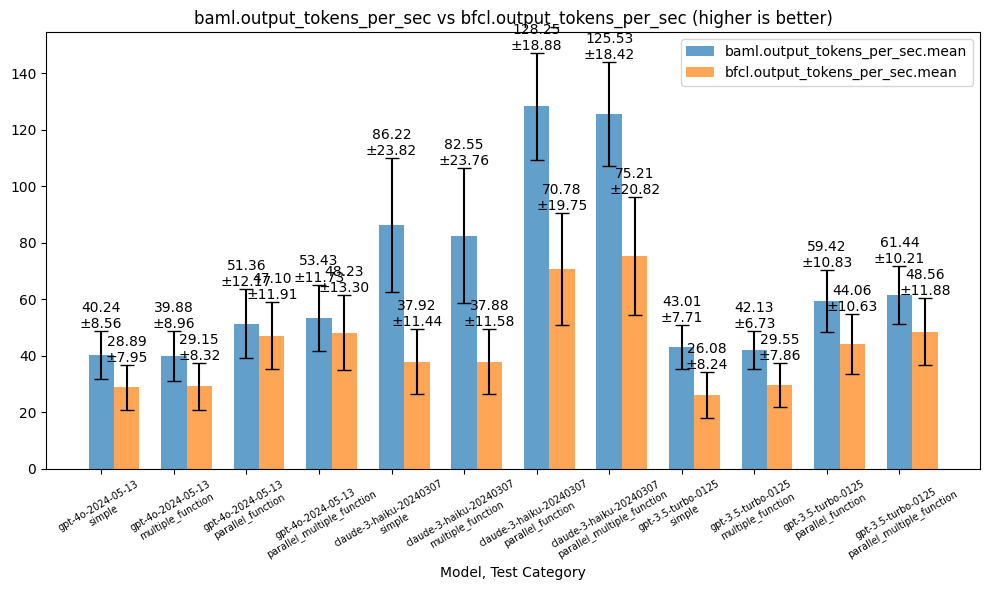

In [8]:


import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data

fmt = {
  'input_tokens': {'fmt': '.0f', 'title_suffix': 'lower is better'},
  'output_tokens': {'fmt': '.0f', 'title_suffix': 'lower is better'},
  'cost': {'fmt': '.5f', 'title_suffix': 'lower is better'},
  'cost.std': {'fmt': '.5f', 'title_suffix': 'lower is better'},
  'latency_ms': {'fmt': '.0f', 'title_suffix': 'lower is better'},
  'output_tokens_per_sec': {'fmt': '.2f', 'title_suffix': 'higher is better'},
}


for i, metric in enumerate(metrics):
  plt.figure(i)

  fig, ax = plt.subplots(figsize=(10, 6))  # Two subplots
  df = pd.DataFrame(
    {
      'label_mc': f"{t.model}\n{t.test_category}",
      f'baml.{metric}.mean': t.df[f'baml.{metric}'].mean(),
      f'baml.{metric}.std': t.df[f'baml.{metric}'].std(),
      f'bfcl.{metric}.mean': t.df[f'bfcl.{metric}'].mean(),
      f'bfcl.{metric}.std': t.df[f'bfcl.{metric}'].std(),
    }
    for t in load_data()
  )

  # Set up the x positions for the groups
  n = len(df)  # number of groups
  index = range(n)
  bar_width = 0.35


  baml_bars = ax.bar(index, df[f'baml.{metric}.mean'], bar_width, label=f'baml.{metric}.mean', yerr=df[f'baml.{metric}.std'], capsize=5, alpha=0.7)
  baml_labels = [f"{mean:{fmt[metric]['fmt']}}\n±{std:{fmt[metric]['fmt']}}" for mean, std in zip(df[f'baml.{metric}.mean'], df[f'baml.{metric}.std'])]
  ax.bar_label(baml_bars, labels=baml_labels, label_type='edge', fmt='%.3f')

  bfcl_bars = ax.bar([p + bar_width for p in index], df[f'bfcl.{metric}.mean'], bar_width, label=f'bfcl.{metric}.mean', yerr=df[f'bfcl.{metric}.std'], capsize=5, alpha=0.7)
  bfcl_labels = [f"{mean:{fmt[metric]['fmt']}}\n±{std:{fmt[metric]['fmt']}}" for mean, std in zip(df[f'bfcl.{metric}.mean'], df[f'bfcl.{metric}.std'])]
  ax.bar_label(bfcl_bars, labels=bfcl_labels, label_type='edge', fmt='%.3f')

  # Labeling and aesthetics
  ax.set_xlabel('Model, Test Category')
  ax.set_title(f'baml.{metric} vs bfcl.{metric} ({fmt[metric]["title_suffix"]})')

  ax.set_xticks(index)
  ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')

  ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

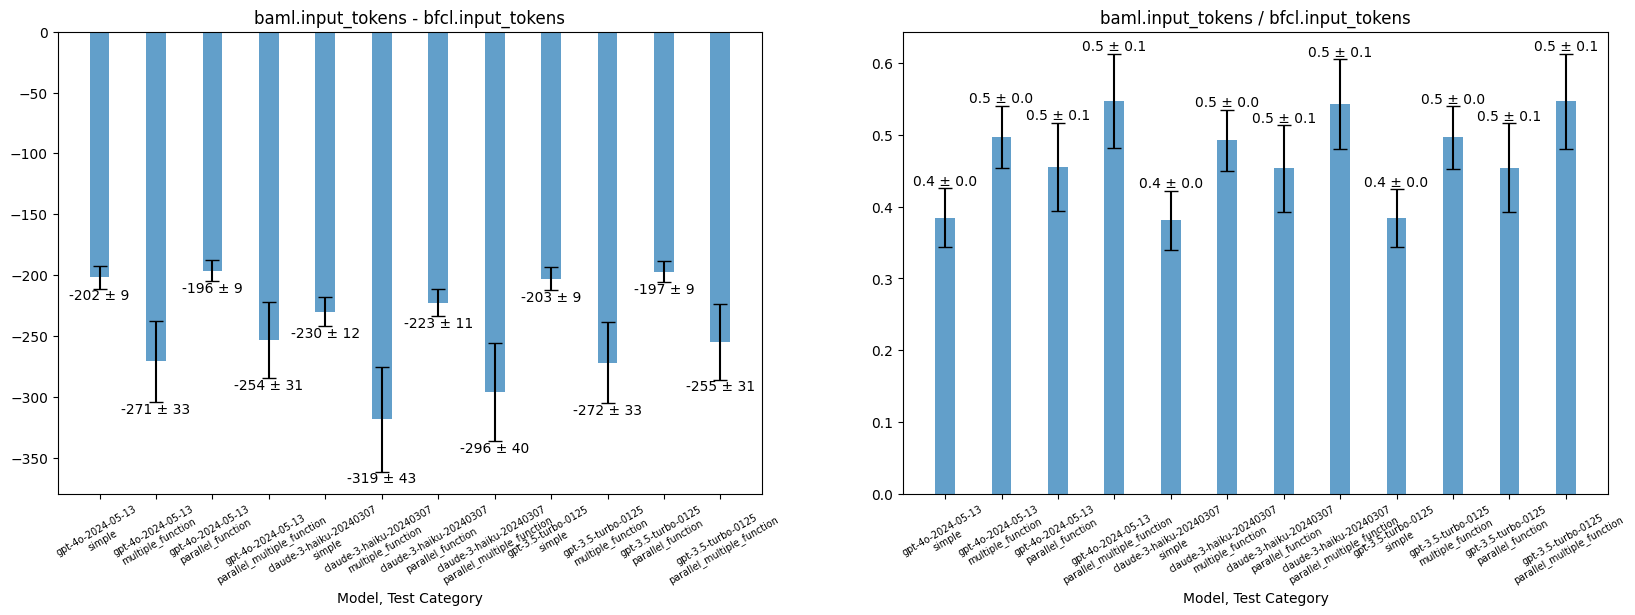

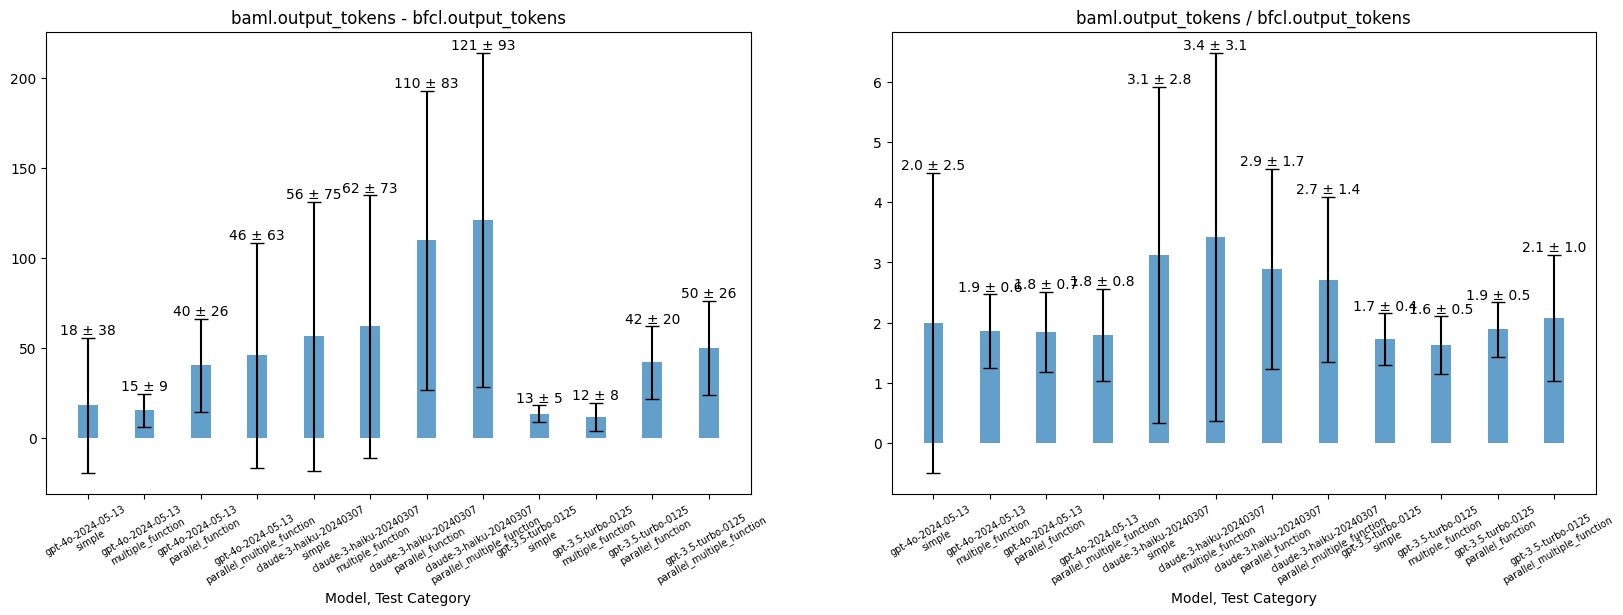

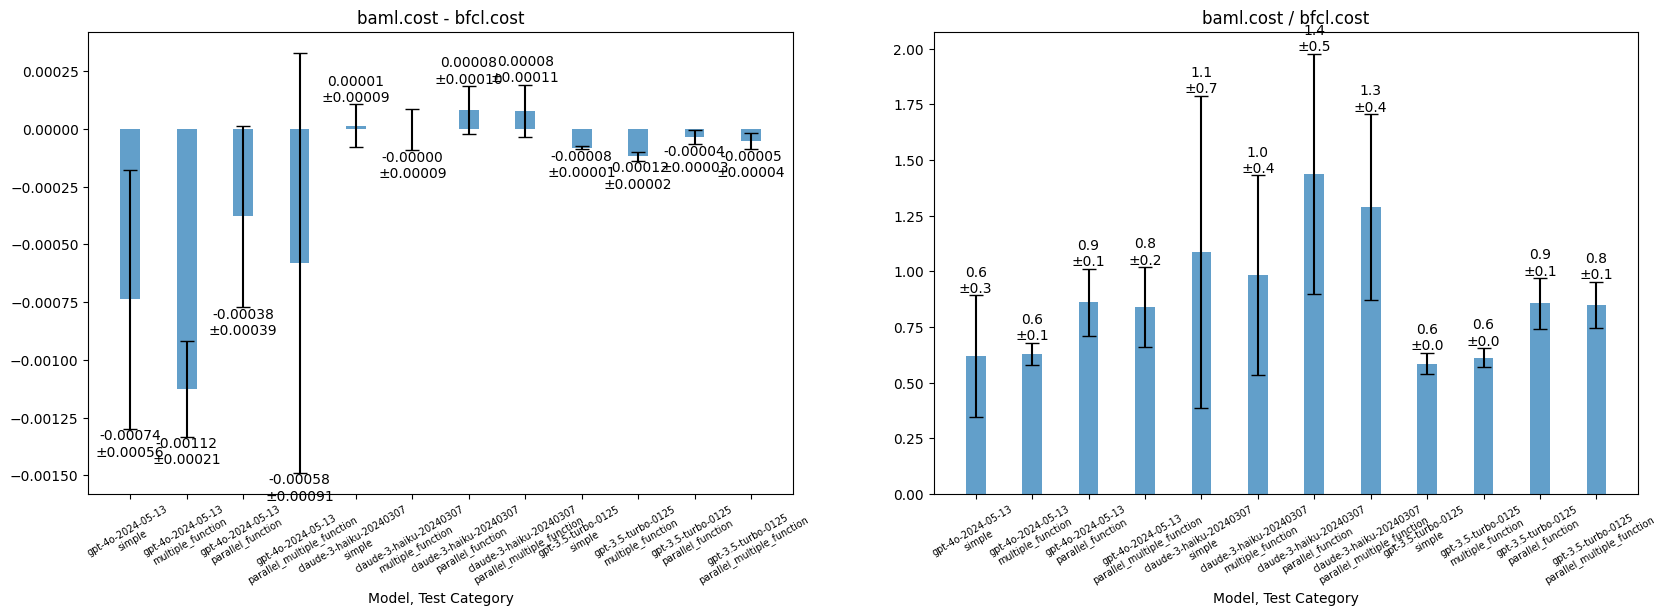

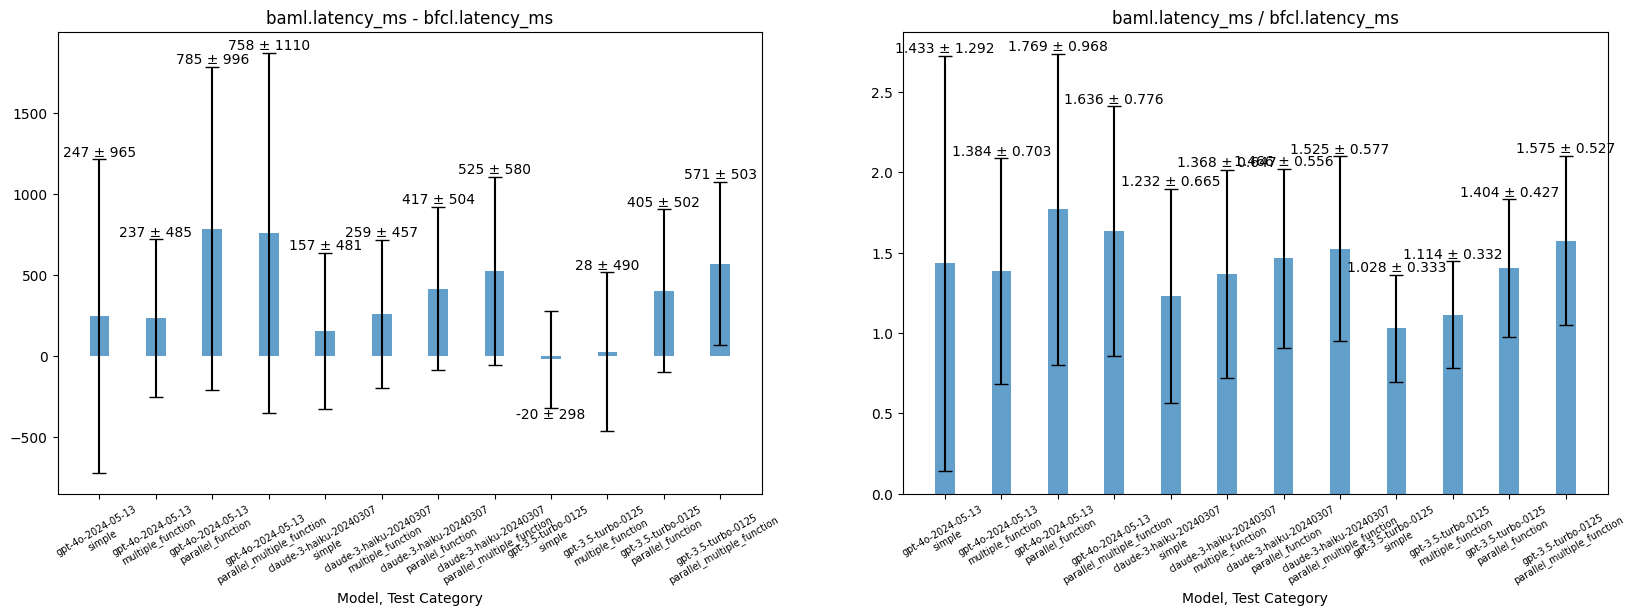

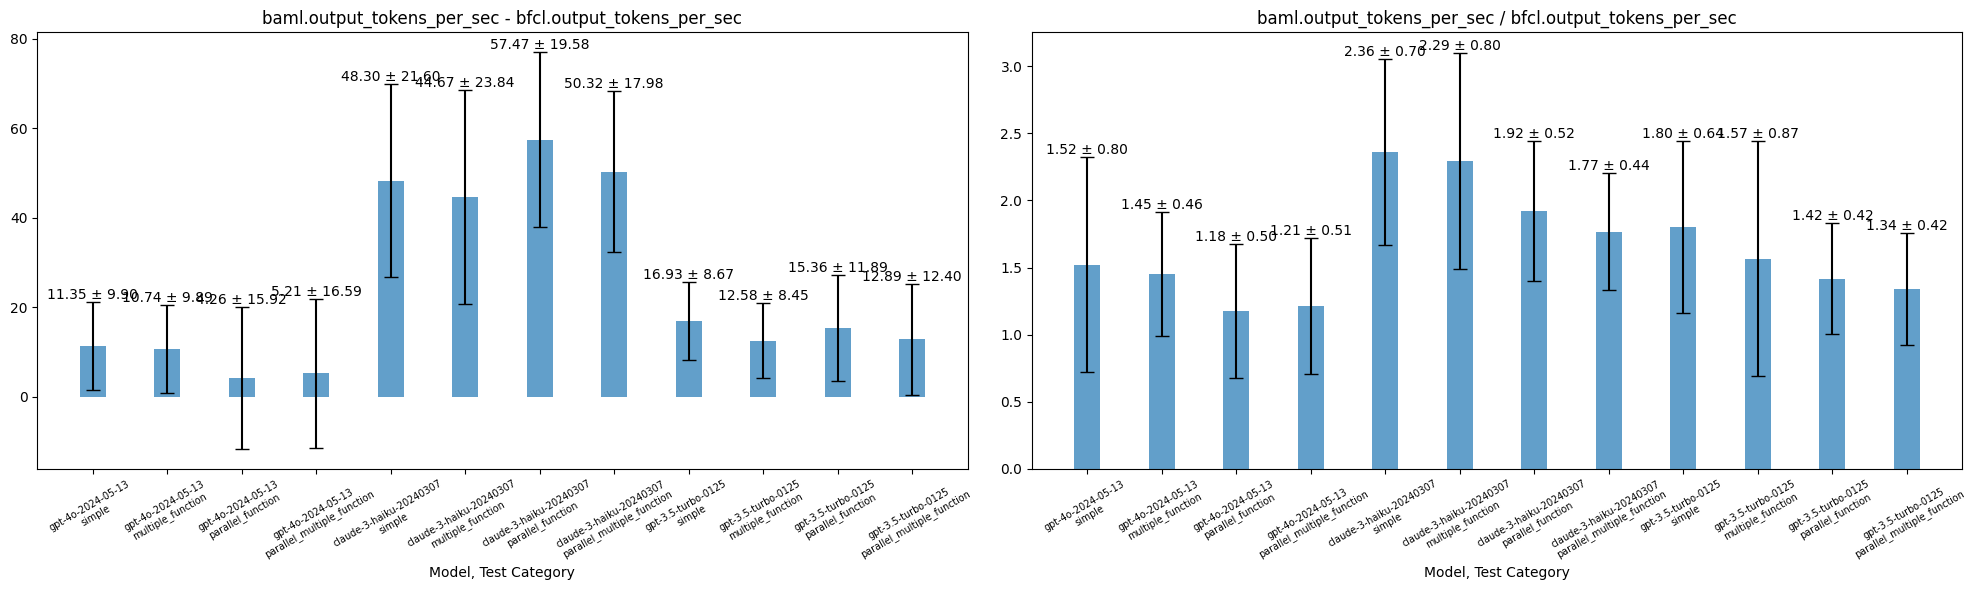

In [11]:

import json
import pandas as pd
import matplotlib.pyplot as plt

from eval import load_data


def apply_op(op: str, x: pd.Series, y: pd.Series) -> pd.Series:
  if op == '-':
    return x - y

  if op == '/':
    return x / y

  raise ValueError(f'Unknown operation: {op}')

fmt = {
  'input_tokens': {'-': '.0f', '/': '.1f'},
  'output_tokens': {'-': '.0f', '/': '.1f'},
  'cost': {'-': '.5f', '/': '.1f', 'std': '\n±'},
  'latency_ms': {'-': '.0f', '/': '.3f'},
  'output_tokens_per_sec': {'-': '.2f', '/': '.2f'},
}

for i, metric in enumerate(metrics):
  plt.figure(i)

  fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Two subplots
  for op, ax in zip(['-', '/'], axes):
    df = pd.DataFrame(
      {
        'label_mc': f"{t.model}\n{t.test_category}",
        f'{metric}.{op}.mean': apply_op(op, t.df[f'baml.{metric}'], t.df[f'bfcl.{metric}']).mean(),
        f'{metric}.{op}.std': apply_op(op, t.df[f'baml.{metric}'], t.df[f'bfcl.{metric}']).std(),
      }
      for t in load_data()
    )

    # Set up the x positions for the groups
    n = len(df)  # number of groups
    index = range(n)
    bar_width = 0.35

    # Create bars for BAML_Median
    bars = ax.bar(index, df[f'{metric}.{op}.mean'], bar_width, yerr=df[f'{metric}.{op}.std'], label=f'{metric} {op}', capsize=5, alpha=0.7)
    labels = [f"{mean:{fmt[metric][op]}}{fmt[metric].get('std' ,' ± ')}{std:{fmt[metric][op]}}" for mean, std in zip(df[f'{metric}.{op}.mean'], df[f'{metric}.{op}.std'])]
    ax.bar_label(bars, labels=labels, label_type='edge', fmt='%.3f')

    # Labeling and aesthetics
    ax.set_xlabel('Model, Test Category')
    ax.set_title(f'baml.{metric} {op} bfcl.{metric}')

    ax.set_xticks(index)
    ax.set_xticklabels(df['label_mc'], rotation=30, fontsize='x-small')

# Show the plot
plt.tight_layout()
plt.show()